In [2]:
pip install pyLDAvis


     |████████████████████████████████| 1.7 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=24e6abe87fda64bbcf65a80a4cc715ed0449de941c9b5949c91fe3d86b14ccab
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [1]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [5]:

import pandas as pd
import numpy as np
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Amazon_reviews.csv')
print('data matrix (rows,column) :',data.shape)
data.head()


data matrix (rows,column) : (34660, 21)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
1  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
2  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
3  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
4  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   

               reviews.date     reviews.dateAdded  \
0  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
1  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
2  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
3  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
4  2017-01-12T00:00:00.000Z  2017-07-03T23:33:15Z   

                                    reviews.dateSeen  ... reviews.doRecommend  \
0  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
1  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
2  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
3  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
4  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   

  reviews.id  reviews.numHelpful  reviews.rating  \
0        NaN                 0.0             5.0   
1        NaN                 0.0             5.0   
2        NaN                 0.0             5.0   
3        NaN                 0.0             4.0   
4        NaN                 0.0             5.0   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5620406/review...   
1  http://reviews.bestbuy.com/3545/5620406/review...   
2  http://reviews.bestbuy.com/3545/5620406/review...   
3  http://reviews.bestbuy.com/3545/5620406/review...   
4  http://reviews.bestbuy.com/3545/5620406/review...   

                                        reviews.text  \
0  This product so far has not disappointed. My c...   
1  great for beginner or experienced person. Boug...   
2  Inexpensive tablet for him to use and learn on...   
3  I've had my Fire HD 8 two weeks now and I love...   
4  I bought this for my grand daughter when she c...   

                             reviews.title reviews.userCity  \
0                                   Kindle              NaN   
1                                very fast              NaN   
2  Beginner tablet for our 9 year old son.              NaN   
3                                  Good!!!              NaN   
4                Fantastic Tablet for kids              NaN   

   reviews.userProvince  reviews.username  
0                   NaN           Adapter  
1                   NaN            truman  
2                   NaN             DaveZ  
3                   NaN            Shacks  
4                   NaN         explore42  

[5 rows x 21 columns]

In [6]:
data.tail()
#data.describe()

id name       asins   brand  \
34655  AVpfiBlyLJeJML43-4Tp  NaN  B006GWO5WK  Amazon   
34656  AVpfiBlyLJeJML43-4Tp  NaN  B006GWO5WK  Amazon   
34657  AVpfiBlyLJeJML43-4Tp  NaN  B006GWO5WK  Amazon   
34658  AVpfiBlyLJeJML43-4Tp  NaN  B006GWO5WK  Amazon   
34659  AVpfiBlyLJeJML43-4Tp  NaN  B006GWO5WK  Amazon   

                                              categories  \
34655  Computers/Tablets & Networking,Tablet & eBook ...   
34656  Computers/Tablets & Networking,Tablet & eBook ...   
34657  Computers/Tablets & Networking,Tablet & eBook ...   
34658  Computers/Tablets & Networking,Tablet & eBook ...   
34659  Computers/Tablets & Networking,Tablet & eBook ...   

                                                    keys  \
34655  newamazonkindlefirehd9wpowerfastadaptercharger...   
34656  newamazonkindlefirehd9wpowerfastadaptercharger...   
34657  newamazonkindlefirehd9wpowerfastadaptercharger...   
34658  newamazonkindlefirehd9wpowerfastadaptercharger...   
34659  newamazonkindlefirehd9wpowerfastadaptercharger...   

                       manufacturer          reviews.date reviews.dateAdded  \
34655  Amazon Digital Services, Inc  2012-09-18T00:00:00Z               NaN   
34656  Amazon Digital Services, Inc  2012-11-21T00:00:00Z               NaN   
34657  Amazon Digital Services, Inc  2012-10-19T00:00:00Z               NaN   
34658  Amazon Digital Services, Inc  2012-10-31T00:00:00Z               NaN   
34659  Amazon Digital Services, Inc  2012-12-23T00:00:00Z               NaN   

           reviews.dateSeen  ... reviews.doRecommend reviews.id  \
34655  2015-08-29T00:00:00Z  ...                 NaN        NaN   
34656  2015-09-02T00:00:00Z  ...                 NaN        NaN   
34657  2015-09-04T00:00:00Z  ...                 NaN        NaN   
34658  2015-09-01T00:00:00Z  ...                 NaN        NaN   
34659  2015-11-01T00:00:00Z  ...                 NaN        NaN   

       reviews.numHelpful  reviews.rating  \
34655                 NaN             3.0   
34656                 NaN             1.0   
34657                 NaN             1.0   
34658                 NaN             1.0   
34659                 NaN             1.0   

                                      reviews.sourceURLs  \
34655  http://www.amazon.com/Amazon-PowerFast-Adapter...   
34656  http://www.amazon.com/Amazon-PowerFast-Adapter...   
34657  http://www.amazon.com/Amazon-PowerFast-Adapter...   
34658  http://www.amazon.com/Amazon-PowerFast-Adapter...   
34659  http://www.amazon.com/Amazon-PowerFast-Adapter...   

                                            reviews.text  \
34655  This is not appreciably faster than any other ...   
34656  Amazon should include this charger with the Ki...   
34657  Love my Kindle Fire but I am really disappoint...   
34658  I was surprised to find it did not come with a...   
34659  to spite the fact that i have nothing but good...   

                                           reviews.title reviews.userCity  \
34655  Not appreciably faster than any other 1.8A cha...              NaN   
34656                                 Should be included              NaN   
34657                              Disappointing Charger              NaN   
34658                                Not worth the money              NaN   
34659                              as with everyone else              NaN   

       reviews.userProvince  reviews.username  
34655                   NaN              Kris  
34656                   NaN  Jonathan Stewart  
34657                   NaN          J Lawson  
34658                   NaN    Just the Buyer  
34659                   NaN             sandi  

[5 rows x 21 columns]

In [7]:
data.isna().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               5
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            2
dtype: int64

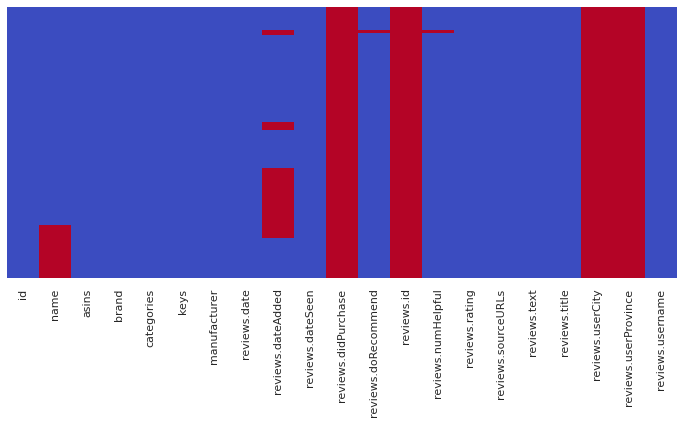

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.gcf()

# Changing Seaborn Plot size
fig.set_size_inches(12, 5)
sns.set(font_scale=1)
#plt.figure(figsize=(12, 5))
sns.heatmap(data=data.isna(),yticklabels=False,cmap='coolwarm',cbar=False)

In [9]:
#so drop all columns having MAX NAN values
col_to_drop=['reviews.id','reviews.didPurchase','reviews.userCity','reviews.userProvince']
#data=data.drop(['reviews.id','reviews.didPurchase','reviews.userCity','reviews.userProvince'],axis=1)
data=data.drop([*col_to_drop],axis=1)
print('after dropping column :',data.shape)

after dropping column : (34660, 17)


In [11]:
# Number of unique values in each column, excluding NAN
data.nunique(dropna=True)

id                        42
name                      48
asins                     41
brand                      6
categories                41
keys                      42
manufacturer               2
reviews.date            1078
reviews.dateAdded       1941
reviews.dateSeen        3911
reviews.doRecommend        2
reviews.numHelpful        97
reviews.rating             5
reviews.sourceURLs     11929
reviews.text           34659
reviews.title          19767
reviews.username       26789
dtype: int64

In [12]:
# for our analysis, we need only reviews.sourceURLs, reviews.text, reviews.title and reviews.username

data=data[['reviews.sourceURLs', 'reviews.text', 'reviews.title','reviews.username']]
print(data.shape)
data.head()

(34660, 4)


reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5620406/review...   
1  http://reviews.bestbuy.com/3545/5620406/review...   
2  http://reviews.bestbuy.com/3545/5620406/review...   
3  http://reviews.bestbuy.com/3545/5620406/review...   
4  http://reviews.bestbuy.com/3545/5620406/review...   

                                        reviews.text  \
0  This product so far has not disappointed. My c...   
1  great for beginner or experienced person. Boug...   
2  Inexpensive tablet for him to use and learn on...   
3  I've had my Fire HD 8 two weeks now and I love...   
4  I bought this for my grand daughter when she c...   

                             reviews.title reviews.username  
0                                   Kindle          Adapter  
1                                very fast           truman  
2  Beginner tablet for our 9 year old son.            DaveZ  
3                                  Good!!!           Shacks  
4                Fantastic Tablet for kids        explore42

In [13]:
data.isna().sum()

reviews.sourceURLs    0
reviews.text          1
reviews.title         5
reviews.username      2
dtype: int64

In [14]:
# Print the rows having NAN vlues 
nan_values = data[data.isna().any(axis=1)]
nan_values

reviews.sourceURLs  \
3083   https://www.amazon.com/product-reviews/B01J2G4...   
3111   https://www.amazon.com/product-reviews/B01J2G4...   
9212   http://reviews.bestbuy.com/3545/5025800/review...   
21953  https://redsky.target.com/groot-domain-api/v1/...   
25515  http://reviews.bestbuy.com/3545/5588528/review...   
28578  https://redsky.target.com/groot-domain-api/v1/...   
28680  https://redsky.target.com/groot-domain-api/v1/...   

                                            reviews.text  \
3083                                   A must have item.   
3111                                                 NaN   
9212   I bought two of these tablets for my nephews! ...   
21953                 I like it. I use mostly for music.   
25515  I was totally stoked about this product becaus...   
28578                           I'm in LOVE with ALEXA!!   
28680  Love it ! I started with a kindle,then a fire ...   

                                reviews.title   reviews.username  
3083                                      NaN              Bev H  
3111                               Five Stars  lawrence s martin  
9212   Better price and versatility than a DS                NaN  
21953                                     NaN                NaN  
25515                                     NaN         Beverage94  
28578                                     NaN               Wdaa  
28680                                     NaN          Sweet1953

In [15]:
#lower casing the abstract so that 'text', 'Text, 'TEXT' are treated in the same way and also help in duplication while countint the frequency
data['reviews.text']=data['reviews.text'].str.lower()
data['reviews.text'].head()

0    this product so far has not disappointed. my c...
1    great for beginner or experienced person. boug...
2    inexpensive tablet for him to use and learn on...
3    i've had my fire hd 8 two weeks now and i love...
4    i bought this for my grand daughter when she c...
Name: reviews.text, dtype: object

In [18]:
#removal pf punctuation
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data['reviews.text']=data['reviews.text'].astype(str).apply(lambda text: remove_punctuation(text))


In [19]:
#removal of stop words.
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
STOPWORDS = (stopwords.words('english'))

STOPWORDS.extend(['from', 'subject','made','using','past','years','3d','year','study','showed','show','ha','time','new','use','useful','hence','objective','aim' 're', 'edu', 'use', 'ieee', 'elsevier', 'ltd', 'rights', 'also', 'find', 'may', 
                   'include'])
STOPWORDS

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]
/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data['reviews.text']=data['reviews.text'].apply(lambda text: remove_stopwords(text))

In [21]:
data['reviews.text'].head()

0    product far disappointed children love like ab...
1    great beginner experienced person bought gift ...
2    inexpensive tablet learn step nabi thrilled le...
3    ive fire hd 8 two weeks love tablet great valu...
4    bought grand daughter comes visit set user ent...
Name: reviews.text, dtype: object

In [22]:
#converting abstarct to list
# Here dop_abstract will take dopant Abstract. for Scaffold data we write scaff_abstract instead of dop_abstract and do the same.
#scaff_abstract= scaffold.Abstract.Values.tolist()
data_text=data['reviews.text']

In [23]:
import re
data_text= [re.sub("\'", "", str(abstract)) for abstract in data_text]
# Remove all non keyboard characters
data_text = [re.sub('[^A-Za-z0-9]+', " ", str(abstract)) for abstract in data_text]

In [24]:
data_text

['product far disappointed children love like ability monitor control content see ease',
 'great beginner experienced person bought gift loves',
 'inexpensive tablet learn step nabi thrilled learn skype already',
 'ive fire hd 8 two weeks love tablet great valuewe prime members tablet shines love able easily access prime content well movies download watch laterthis 1280800 screen really nice look nice crisp bright infact brighter ipad pro costing 900 base model build fire insanely awesome running 77mm thick smooth glossy feel back really amazing hold like futuristic tab ur hands',
 'bought grand daughter comes visit set user entered age name amazon makes sure accesses sites content appropriate age simple loves capabilities bought installed 64gig sd card gives little tablet plenty storage price think tablet best one spend hundreds dollars additional speed capacity comes basics tablets everything people ever need fraction cost',
 'amazon fire 8 inch tablet perfect size purchased husband 

In [25]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

In [26]:
# split sentence into words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

abstracts_words = list(sent_to_words(data_text))

In [27]:
print(abstracts_words[:1])

[['product', 'far', 'disappointed', 'children', 'love', 'like', 'ability', 'monitor', 'control', 'content', 'see', 'ease']]


In [28]:
from gensim.models import Phrases
bigram = Phrases(abstracts_words, min_count=3, threshold=10) 
trigram = Phrases(bigram[abstracts_words], threshold=10)  

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [29]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [30]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [31]:
# Form Bigrams
abstracts_words_bigrams = make_bigrams(abstracts_words)

# Form Trigrams
abstracts_words_trigrams = make_trigrams(abstracts_words_bigrams)

abstracts_words_bigrams

[['product',
  'far',
  'disappointed',
  'children',
  'love',
  'like',
  'ability',
  'monitor',
  'control',
  'content',
  'see',
  'ease'],
 ['great', 'beginner', 'experienced', 'person', 'bought', 'gift', 'loves'],
 ['inexpensive',
  'tablet',
  'learn',
  'step',
  'nabi',
  'thrilled',
  'learn',
  'skype',
  'already'],
 ['ive',
  'fire_hd',
  'two_weeks',
  'love',
  'tablet',
  'great',
  'valuewe',
  'prime_members',
  'tablet',
  'shines',
  'love',
  'able',
  'easily',
  'access',
  'prime',
  'content',
  'well',
  'movies',
  'download',
  'watch',
  'laterthis',
  'screen',
  'really',
  'nice',
  'look',
  'nice',
  'crisp',
  'bright',
  'infact',
  'brighter',
  'ipad_pro',
  'costing',
  'base_model',
  'build',
  'fire',
  'insanely',
  'awesome',
  'running',
  'mm',
  'thick',
  'smooth',
  'glossy',
  'feel',
  'back',
  'really',
  'amazing',
  'hold',
  'like',
  'futuristic',
  'tab',
  'ur',
  'hands'],
 ['bought',
  'grand_daughter',
  'comes',
  'visit'

In [32]:
abstracts_words_trigrams

[['product',
  'far',
  'disappointed',
  'children',
  'love',
  'like',
  'ability',
  'monitor',
  'control',
  'content',
  'see',
  'ease'],
 ['great', 'beginner', 'experienced', 'person', 'bought', 'gift', 'loves'],
 ['inexpensive',
  'tablet',
  'learn',
  'step',
  'nabi',
  'thrilled',
  'learn',
  'skype',
  'already'],
 ['ive',
  'fire_hd',
  'two_weeks',
  'love',
  'tablet',
  'great',
  'valuewe',
  'prime_members',
  'tablet',
  'shines',
  'love',
  'able',
  'easily',
  'access_prime',
  'content',
  'well',
  'movies',
  'download',
  'watch',
  'laterthis',
  'screen',
  'really',
  'nice',
  'look',
  'nice',
  'crisp',
  'bright',
  'infact',
  'brighter',
  'ipad_pro',
  'costing',
  'base_model',
  'build',
  'fire',
  'insanely',
  'awesome',
  'running',
  'mm',
  'thick',
  'smooth',
  'glossy',
  'feel',
  'back',
  'really',
  'amazing',
  'hold',
  'like',
  'futuristic',
  'tab',
  'ur',
  'hands'],
 ['bought',
  'grand_daughter',
  'comes',
  'visit',
  '

In [33]:
import spacy


def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


In [34]:
#python -m spacy download en
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
#nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
# data_lemmatized = lemmatization(abstracts_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
data_lemmatized = lemmatization(abstracts_words_trigrams, allowed_postags=['NOUN'])

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: Sele

In [35]:
print(data_lemmatized[:3])

[['product', 'child', 'ability', 'monitor', 'control', 'content', 'ease'], ['person', 'gift', 'love'], ['tablet', 'step']]


In [37]:
# Save data lemmatized in to pickle data persistence
import pickle

PKL_Loc = "C:/Users/LENOVO/Desktop/LDATopicModelling-main"
# open a file, where you ant to store the data
filename = 'dogs1'
file = open(filename,'wb')
#file = open(PKL_Loc + 'N_data_lemmatized_Sust_AND_Trans.pkl', 'wb')
# dump information to that file
pickle.dump(data_lemmatized, file)
# close the file
file.close()

In [38]:
#create dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [39]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=50,
                                           alpha='auto',
                                           per_word_topics=True)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [40]:
from pprint import pprint
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('feature', 0.1290903),
   ('program', 0.09134933),
   ('memory', 0.082085855),
   ('friend', 0.07638884),
   ('download', 0.0615908),
   ('other', 0.05089108),
   ('view', 0.027827265),
   ('prime', 0.019537318),
   ('world', 0.01840682),
   ('highly_recommend', 0.017441751)]),
 (16,
  [('buffering', 0.08916661),
   ('performance', 0.06702061),
   ('easy_set', 0.061693955),
   ('store', 0.05188792),
   ('router', 0.044379413),
   ('software', 0.039896503),
   ('processor', 0.03725113),
   ('alexa', 0.032732897),
   ('fun', 0.027795665),
   ('help', 0.027524479)]),
 (7,
  [('work', 0.20883168),
   ('firetv', 0.10440195),
   ('buy', 0.0731822),
   ('amazon_prime', 0.05691563),
   ('gift', 0.044289574),
   ('application', 0.034619004),
   ('controller', 0.033853643),
   ('couple', 0.027308613),
   ('command', 0.023647187),
   ('answer', 0.014697723)]),
 (6,
  [('fire', 0.17328647),
   ('would_recommend', 0.09520363),
   ('medium', 0.07146168),
   ('entertainment', 0.06002446),
  

In [41]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity:  -8.821448829744403

Coherence Score:  0.39415477996642856


In [43]:
import pyLDAvis
import pyLDAvis.gensim_models 
pyLDAvis.enable_notebook()
m=pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


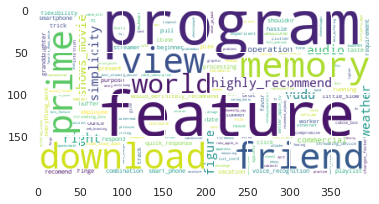

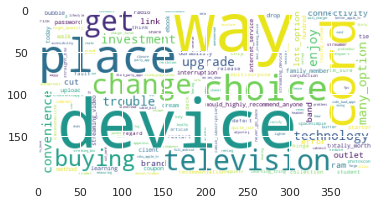

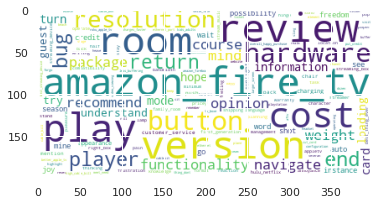

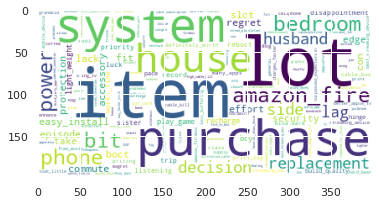

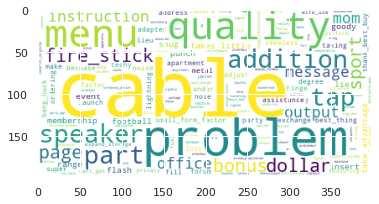

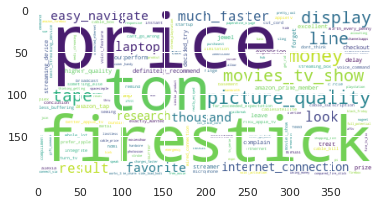

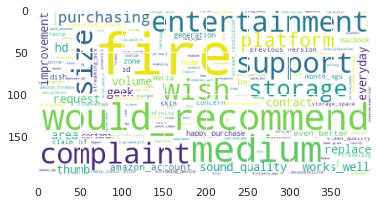

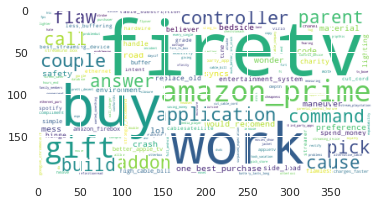

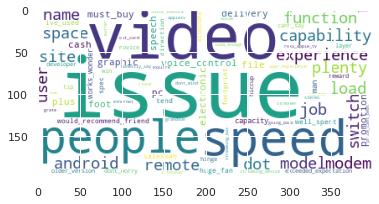

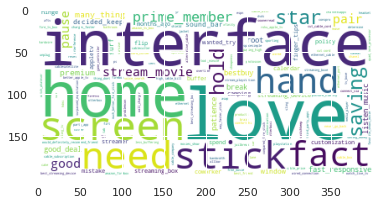

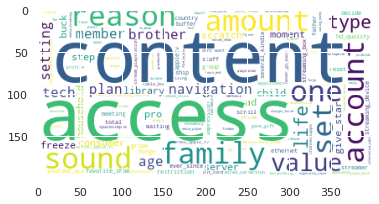

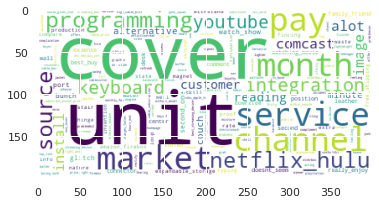

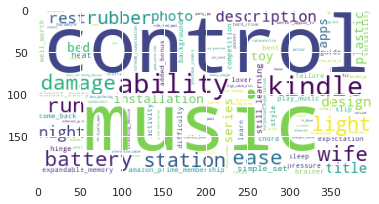

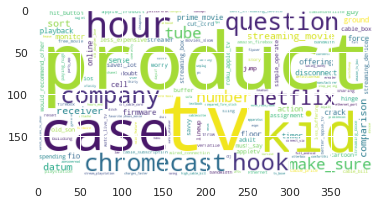

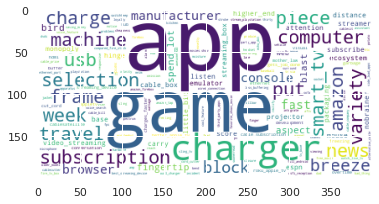

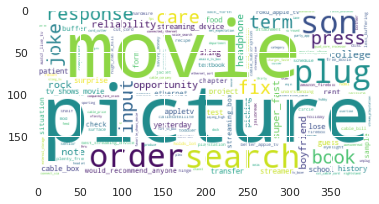

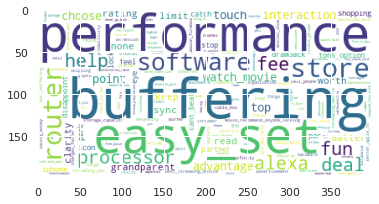

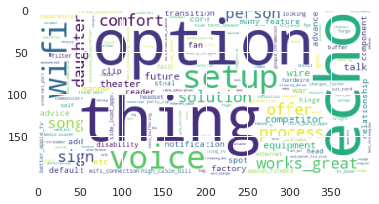

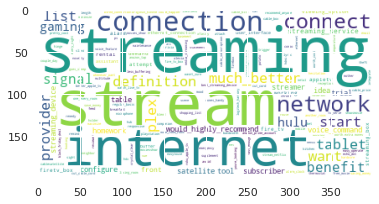

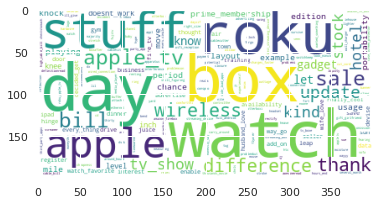

In [44]:
from wordcloud import WordCloud#, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
for t in range(lda_model.num_topics):
    plt.figure()
    cloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(" ".join(np.array(lda_model.show_topic(t, 200))[: , 0]))
    #plt.savefig('C:/Users/LENOVO/Desktop/LDATopicModelling-main/books_read.png')
    plt.imshow(cloud)